## Imports

In [1]:
import numpy as np
import glob
import os
import shutil
import random
import cv2
from PIL import Image, ImageEnhance
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import uuid

## Functions

In [10]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
 
def retro_filters(img_source, convert_to_grayscale=True,brightness_factor=1.6, noise_level=0.04, pixels_avg=5):
    if (convert_to_grayscale):
        img = img_source.convert('L')
    else:
        img = img_source
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(brightness_factor) 
    open_cv_image = np.array(img)  # convert PIL to CV2
    RGB_img = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
    open_cv_image = sp_noise(RGB_img,noise_level) 
    img_processed = cv2.blur(open_cv_image,(pixels_avg,pixels_avg))
    return img_processed

def retro_filters_safe(img_source, convert_to_grayscale= True):
    return retro_filters(img_source,convert_to_grayscale)

def retro_filters_adventurous(img_source, convert_to_grayscale= True):
    return retro_filters(img_source,convert_to_grayscale, 2.0, 0.07, 6)

def retro_filters_feeling_lucky(img_source, convert_to_grayscale= True):
    return retro_filters(img_source,convert_to_grayscale, 2.3, 0.1, 8)

def retro_filters_slight(img_source, convert_to_grayscale= True):
    return retro_filters(img_source,convert_to_grayscale, 1.2, 0.01, 3)

def horizontal_collage(name, inference_results):
    # Opening the secondary image (overlay image)
    img0_path= r"C:\Users\alsavelv\Documents\photo template landscape mids.png"
    img0 = Image.open(img0_path)

    left_margin=10
    new_width=390

    # original
    img1_path= r"C:\\Users\\alsavelv\\Documents\\GitHub\\GFPGAN\\" + inference_results + "\\cropped_faces\\" + name +"_00.png"
    # Opening the primary image (used in background)
    img1 = Image.open(img1_path)
    img1.putalpha(255)
    width, height = img1.size
    new_height=new_width*height//width
    newsize = (new_width, new_height) 
    img1_resized = img1.resize(newsize)

    # Pasting img2 image on top of img1 
    # starting at coordinates (0, 0)
    img0.paste(img1_resized, (left_margin+10,170), mask = img1_resized) 

    # vintage
    img1_path= r"C:\\Users\\alsavelv\\Documents\\GitHub\\GFPGAN\\"+ inference_results +"\\cropped_faces\\" + name + "_vintage_00.png"
    # Opening the primary image (used in background)
    img1 = Image.open(img1_path)
    img1.putalpha(255)
    width, height = img1.size 
    new_height=new_width*height//width
    newsize = (new_width, new_height) 
    img1_resized = img1.resize(newsize)

    # Pasting img2 image on top of img1 
    # starting at coordinates (0, 0)
    img0.paste(img1_resized, (left_margin+430,170), mask = img1_resized) 

    # restored
    img1_path= r"C:\\Users\\alsavelv\\Documents\\GitHub\\GFPGAN\\"+ inference_results +"\\restored_faces\\"+ name + "_vintage_00.png"
    # Opening the primary image (used in background)
    img1 = Image.open(img1_path)
    img1.putalpha(255)
    width, height = img1.size 
    new_height=new_width*height//width
    newsize = (new_width, new_height) 
    img1_resized = img1.resize(newsize)

    # Pasting img2 image on top of img1 
    # starting at coordinates (0, 0)
    img0.paste(img1_resized, (left_margin+850,170), mask = img1_resized) 


    out_path= r"C:\\Users\\alsavelv\\Documents\\MLADS\\" + name + "_photo_glued_01c.png"
    img0.save(out_path,"PNG")
    # Displaying the image
    return img0

## Inter file name

In [3]:
name = "Vasanth"
guid=str(uuid.uuid4())

## Capture an image (should be one person only):

### either from cam

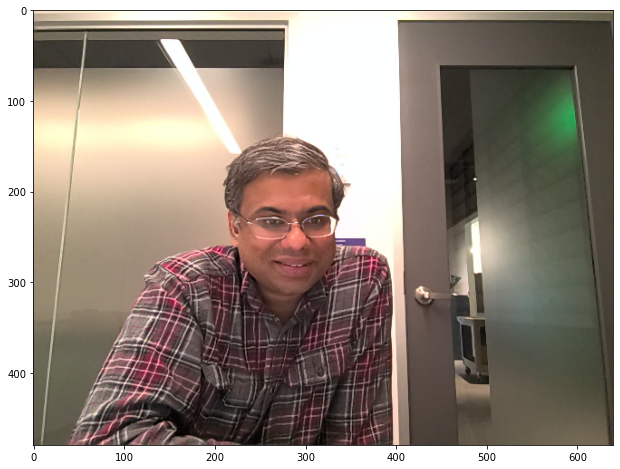

In [38]:
cap = cv2.VideoCapture(2)
status , photo = cap.read()
source_path=r'C:\\Users\\alsavelv\\Documents\\MLADS\\' + name +'.png'
cv2.imwrite(source_path,photo)
cap.release()  
RGB_img = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img, cmap="gray")
plt.show()

### or load from a local file

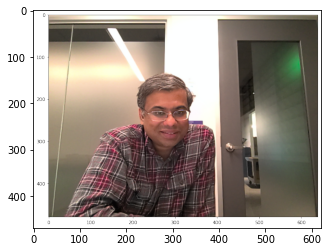

In [6]:
name="Vasanth"
source_path=r'C:\\Users\\alsavelv\\Documents\\MLADS\\' + name +'.png'
photo = Image.open(source_path) 
#RGB_img = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
plt.imshow(photo, cmap="gray")
plt.show()

## Packaged retro style processing

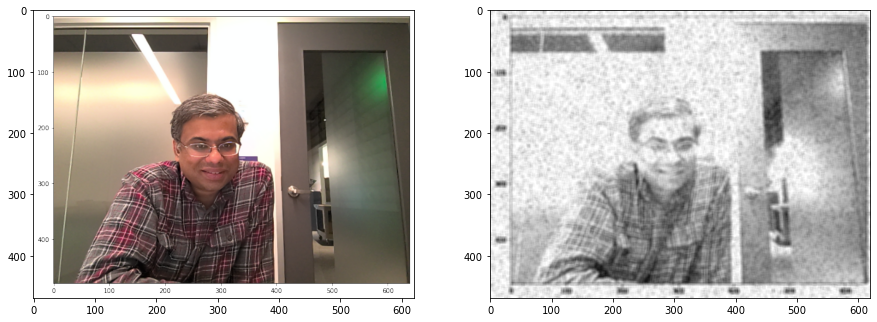

In [7]:
out_path=r'C:\\Users\\alsavelv\\Documents\\MLADS\\'+ name + '_vintage.png'


img_source = Image.open(source_path) 
img_processed=retro_filters_adventurous(img_source)
cv2.imwrite(out_path, img_processed)

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 15 ,8

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_source, cmap="gray")
RGB_img = cv2.cvtColor(img_processed, cv2.COLOR_BGR2RGB)
ax[1].imshow(RGB_img, cmap="gray")

## Run GFP GAN

In [8]:
input_path = "C:\\Users\\alsavelv\\Documents\\GitHub\\GFPGAN\\inputs\\"+name+"_"+guid
inference_results = "results-" + name +"_" + guid

# Check whether the specified path exists or not
isExist = os.path.exists(input_path)

if not isExist:
  
  # Create a new directory because it does not exist 
  os.makedirs(input_path)
  print("The new directory is created!")

# copy input files to the new directory
shutil.copy(out_path, input_path)
shutil.copy(source_path, input_path)

run = f'python C:\\Users\\alsavelv\\Documents\\GitHub\\GFPGAN\\inference_gfpgan.py\
                    -i {input_path}\
                    -o {inference_results}\
                    -v 1.3 -s 2'

The new directory is created!


In [9]:
!{run}

Processing Vasanth.png ...

C:\Users\alsavelv\Documents\GitHub\GFPGAN\inference_gfpgan.py:62: UserWarning: The unoptimized RealESRGAN is slow on CPU. We do not use it. If you really want to use it, please modify the corresponding codes.
  warnings.warn('The unoptimized RealESRGAN is slow on CPU. We do not use it. '



Processing Vasanth_vintage.png ...
Results are in the [results-Vasanth_df5bc67e-5f03-4e21-88dc-6896130f152d] folder.


## Generate photo card

### Horizontal collage

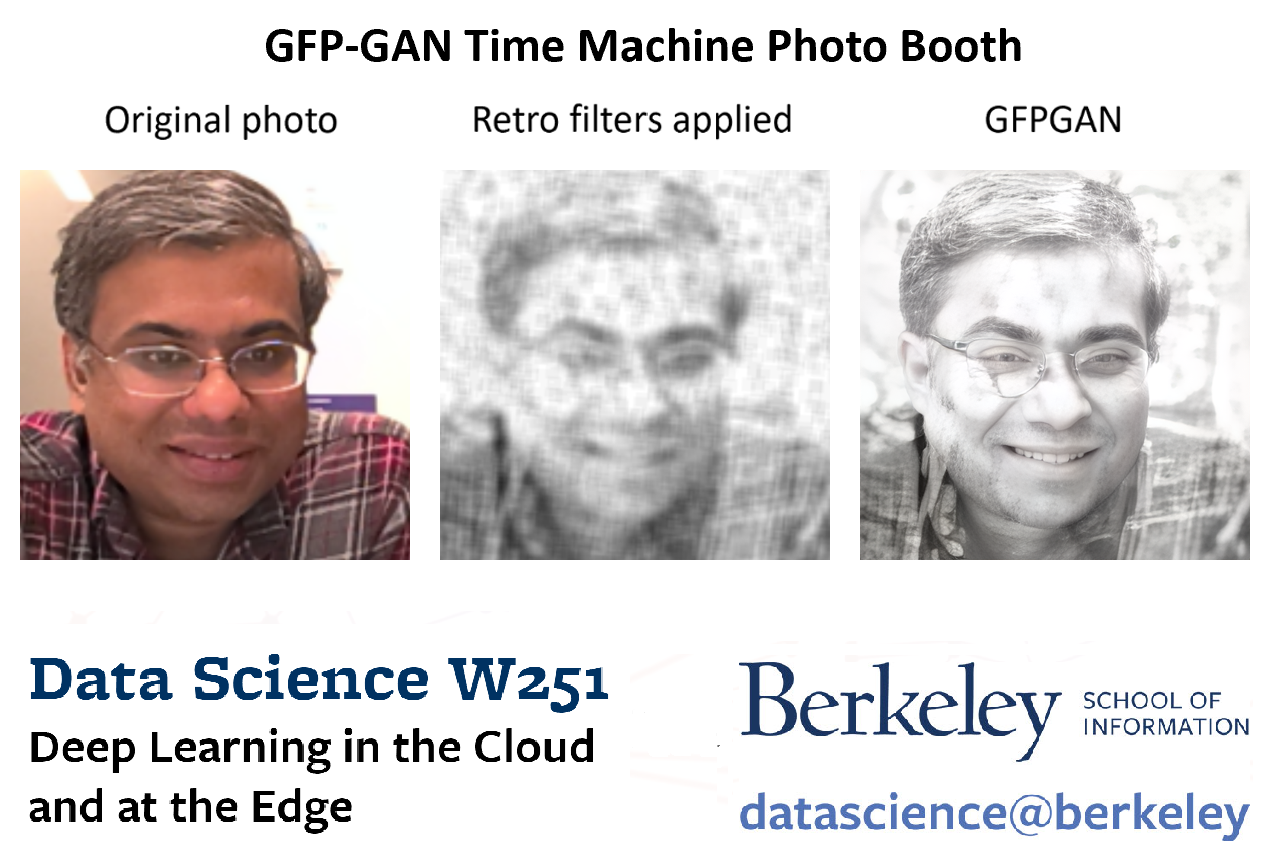

In [12]:
horizontal_collage(name, inference_results)